In [1052]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns

In [1053]:
train_weather = pd.read_csv("../output/train_weather.csv", parse_dates=["Date"])


In [1054]:
train_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              10506 non-null  int64         
 1   Date                    10506 non-null  datetime64[ns]
 2   Address                 10506 non-null  object        
 3   Species                 10506 non-null  object        
 4   Block                   10506 non-null  int64         
 5   Street                  10506 non-null  object        
 6   Trap                    10506 non-null  object        
 7   AddressNumberAndStreet  10506 non-null  object        
 8   Latitude_x              10506 non-null  float64       
 9   Longitude_x             10506 non-null  float64       
 10  AddressAccuracy         10506 non-null  int64         
 11  NumMosquitos            10506 non-null  int64         
 12  WnvPresent              10506 non-null  int64 

In [1055]:
train_weather.drop(columns=["Unnamed: 0"], inplace=True)

In [1056]:
train_weather.describe().T

count          mean           std           min  \
Block              10506.0     35.687797  2.433947e+01     10.000000   
Latitude_x         10506.0     41.841139  1.127415e-01     41.644612   
Longitude_x        10506.0    -87.699908  9.651417e-02    -87.930995   
AddressAccuracy    10506.0      7.819532  1.452921e+00      3.000000   
NumMosquitos       10506.0     12.853512  1.613382e+01      1.000000   
WnvPresent         10506.0      0.052446  2.229357e-01      0.000000   
year               10506.0   2009.576242  2.354645e+00   2007.000000   
month              10506.0      7.692557  1.067675e+00      5.000000   
zip_code           10506.0  60625.462212  8.632335e+01  60018.000000   
Stn1-Lat           10506.0     41.995000  3.787373e-12     41.995000   
Stn2-Lat           10506.0     41.786000  5.592237e-12     41.786000   
Stn1-Long          10506.0    -87.933000  1.267669e-11    -87.933000   
Stn2-Long          10506.0    -87.752000  1.469472e-11    -87.752000   
distance_frm_stn1  10506.0     16.675728  8.029341e+00      2.570000   
distance_frm_stn2  10506.0      9.557179  3.973225e+00      0.530000   
closest_station    10506.0      1.686084  4.641047e-01      1.000000   
Station            10506.0      1.686084  4.641047e-01      1.000000   
Tmax               10506.0     81.928707  8.285836e+00     57.000000   
Tmin               10506.0     63.991053  7.585434e+00     41.000000   
Tavg               10506.0     73.187512  7.506371e+00     50.000000   
Depart             10506.0      2.740244  6.486468e+00    -12.000000   
DewPoint           10506.0     59.653912  7.838916e+00     38.000000   
WetBulb            10506.0     64.893965  6.724637e+00     46.000000   
Heat               10506.0      0.867314  2.680958e+00      0.000000   
Cool               10506.0      9.054826  5.783582e+00      0.000000   
Sunrise            10506.0    468.457263  4.551295e+01    416.000000   
Sunset             10506.0   1870.854559  6.317705e+01   1720.000000   
Depth              10506.0      0.000000  0.000000e+00      0.000000   
SnowFall           10506.0      0.000000  0.000000e+00      0.000000   
PrecipTotal        10506.0      0.164117  3.614010e-01      0.000000   
StnPressure        10506.0     29.291570  1.175195e-01     28.890000   
SeaLevel           10506.0     29.958250  1.171619e-01     29.590000   
ResultSpeed        10506.0      5.918142  2.902601e+00      0.100000   
ResultDir          10506.0     17.688369  9.136063e+00      1.000000   
AvgSpeed           10506.0      7.455930  2.521806e+00      2.100000   

                            25%           50%           75%           max  
Block                 12.000000     33.000000     52.000000     98.000000  
Latitude_x            41.732984     41.846283     41.954690     42.017430  
Longitude_x          -87.760070    -87.694991    -87.627796    -87.531635  
AddressAccuracy        8.000000      8.000000      9.000000      9.000000  
NumMosquitos           2.000000      5.000000     17.000000     50.000000  
WnvPresent             0.000000      0.000000      0.000000      1.000000  
year                2007.000000   2009.000000   2011.000000   2013.000000  
month                  7.000000      8.000000      8.000000     10.000000  
zip_code           60617.000000  60633.000000  60646.000000  60827.000000  
Stn1-Lat              41.995000     41.995000     41.995000     41.995000  
Stn2-Lat              41.786000     41.786000     41.786000     41.786000  
Stn1-Long            -87.933000    -87.933000    -87.933000    -87.933000  
Stn2-Long            -87.752000    -87.752000    -87.752000    -87.752000  
distance_frm_stn1     10.550000     16.300000     23.890000     30.850000  
distance_frm_stn2      7.170000      9.590000     12.420000     16.310000  
closest_station        1.000000      2.000000      2.000000      2.000000  
Station                1.000000      2.000000      2.000000      2.000000  
Tmax                  78.000000     83.000000     88.000000 

<AxesSubplot:xlabel='year', ylabel='count'>

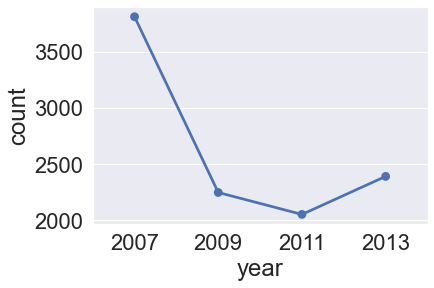

In [1057]:
yearly_mosquitos_count = train_weather.groupby("year")["NumMosquitos"].agg(["count"]).reset_index()
sns.pointplot(x="year", y="count", data=yearly_mosquitos_count, legend=True)

2007 had higher mosquito count and 2013 saw the raise again.

In [1058]:
print ( train_weather.Date.dt.year.unique() )

[2007 2009 2011 2013]


In [1059]:
codesum_desc = {"FC" : "FUNNEL CLOUD",
"TS" : "THUNDERSTORM",
"GR" : "HAIL",
"RA" : "RAIN",
"DZ" : "DRIZZLE",
"SN" : "SNOW",
"SG" : "SNOW GRAINS",
"GS" : "SMALL HAIL &/OR SNOW PELLETS",
"PL" :"ICE PELLETS",
"IC" :"ICE CRYSTALS",
"FG+": "HEAVY FOG (FG & LE.25 MILES VISIBILITY)",
"FG" : "FOG",
"BR" : "MIST",
"UP" : "UNKNOWN PRECIPITATION",
"HZ" : "HAZE",
"FU" : "SMOKE",
"VA" : "VOLCANIC ASH",
"DU" : "WIDESPREAD DUST",
"DS" : "DUSTSTORM",
"PO" : "SAND/DUST WHIRLS",
"SA" : "SAND",
"SS" : "SANDSTORM",
"PY" : "SPRAY",
"SQ" : "SQUALL",
"DR" : "LOW DRIFTING",
"SH" : "SHOWER",
"FZ" : "FREEZING",
"MI" : "SHALLOW",
"PR" : "PARTIAL",
"BC" : "PATCHES",
"BL" : "BLOWING",
"VC" : "VICINITY"}


In [1060]:
# CodeSumDesc = {"BR":"MIST","DZ":"DRIZZLE","FG":"FOG","HZ":"HAZE","RA":"RAIN", "TS":"THUNDERSTORM","VC":"VICINITY"}

train_weather["CodeSumDesc"] = pd.Series([codesum_desc[i[:2]] for i in train_weather.CodeSum if i != ' '])
train_weather.CodeSumDesc.fillna("OTHER", inplace=True)

This Codesum column would tell us if there was Mist, Light Rain, Normal Rain, Heavy Rain.

In [1061]:
train_weather["week"] = train_weather["Date"].dt.isocalendar().week
train_weather["day_of_week"] = train_weather["Date"].apply(lambda x: x.weekday())
train_weather["day_of_month"] = train_weather["Date"].dt.day


In [1062]:
def relative_humidity(Tavg,DewPoint):

    Tavg_celsius = (Tavg-32.0)/1.8
    DewPoint_celsius = (DewPoint-32.0)/1.8

    saturation_vapour_pressure = 6.11*10.0**(7.5*Tavg_celsius/(237.7+Tavg_celsius))
    actual_pressure = 6.11*10.0**(7.5*DewPoint_celsius/(237.7+DewPoint_celsius))

    return round(((actual_pressure/saturation_vapour_pressure)*100),2)

train_weather['Relative_humidity']=relative_humidity(train_weather.Tavg,train_weather.DewPoint)

In [1063]:
train_weather.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude_x', 'Longitude_x',
       'AddressAccuracy', 'NumMosquitos', 'WnvPresent', 'year-mm', 'year',
       'month', 'zip_code', 'geometry', 'Stn1-Lat', 'Stn2-Lat', 'Stn1-Long',
       'Stn2-Long', 'distance_frm_stn1', 'distance_frm_stn2',
       'closest_station', 'Station', 'Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum',
       'Depth', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'CodeSumDesc', 'week',
       'day_of_week', 'day_of_month', 'Relative_humidity'],
      dtype='object')

In [1064]:
train_weather.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet  Latitude_x  Longitude_x  \
0  4100  N OAK PARK AVE, Chicago, IL   41.954690   -87.800991   
1  4100  N OAK PARK AVE, Chicago, IL   41.954690   -87.800991   
2   6200  N MANDELL AVE, Chicago, IL   41.994991   -87.769279   
3    7900  W FOSTER AVE, Chicago, IL   41.974089   -87.824812   
4    7900  W FOSTER AVE, Chicago, IL   41.974089   -87.824812   

   AddressAccuracy  ...  StnPressure  SeaLevel ResultSpeed  ResultDir  \
0                9  ...        29.39     30.11         5.8         18   
1                9  ...        29.39     30.11         5.8         18   
2                9  ...        29.39     30.11         5.8         18   
3                8  ...        29.39     30.11         5.8         18   
4                8  ...        29.39     30.11         5.8         18   

   AvgSpeed  CodeSumDesc week  day_of_week  day_of_month  Relative_humidity  
0       6.5         MIST   22            1            29              57.44  
1       6.5         MIST   22            1            29              57.44  
2       6.5         MIST   22            1            29              57.44  
3       6.5         MIST   22            1            29              57.44  
4       6.5         MIST   22            1            29              57.44  

[5 rows x 49 columns]

In [1065]:
train_df = train_weather[['Date','Station','Latitude_x', 'Longitude_x', 'distance_frm_stn1', 'distance_frm_stn2','closest_station','Species','NumMosquitos', 'WnvPresent', 'year','month',  'week', 'day_of_week','day_of_month', 'Tmax', 'Tmin', 'Tavg', 'Depart','DewPoint', 'WetBulb', 'Relative_humidity','Heat', 'Cool', 'CodeSumDesc','PrecipTotal', 'StnPressure', 'SeaLevel','ResultSpeed', 'ResultDir']]

In [1066]:
# drop duplicates.
train_df = train_df.drop_duplicates(keep="first")

Text(0.5, 1.0, 'Mosquito Count Vs Weather Conditions.')

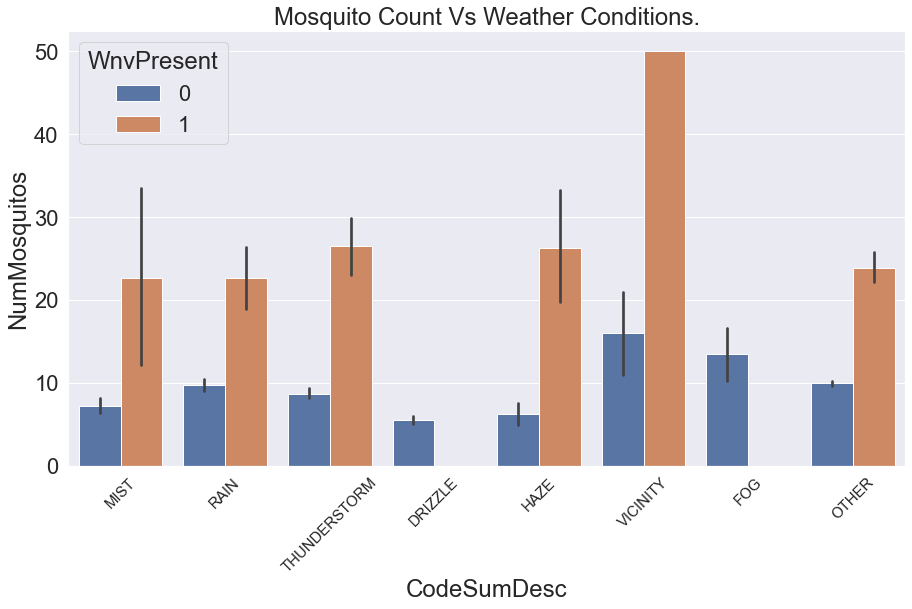

In [1067]:
_ = plt.figure(figsize=(15,8))
p = sns.barplot(data=train_df, x="CodeSumDesc", y="NumMosquitos", hue="WnvPresent", ci=95)
p.set_xticklabels(p.get_xticklabels(),rotation=45, size=15)
plt.title("Mosquito Count Vs Weather Conditions.")

<AxesSubplot:>

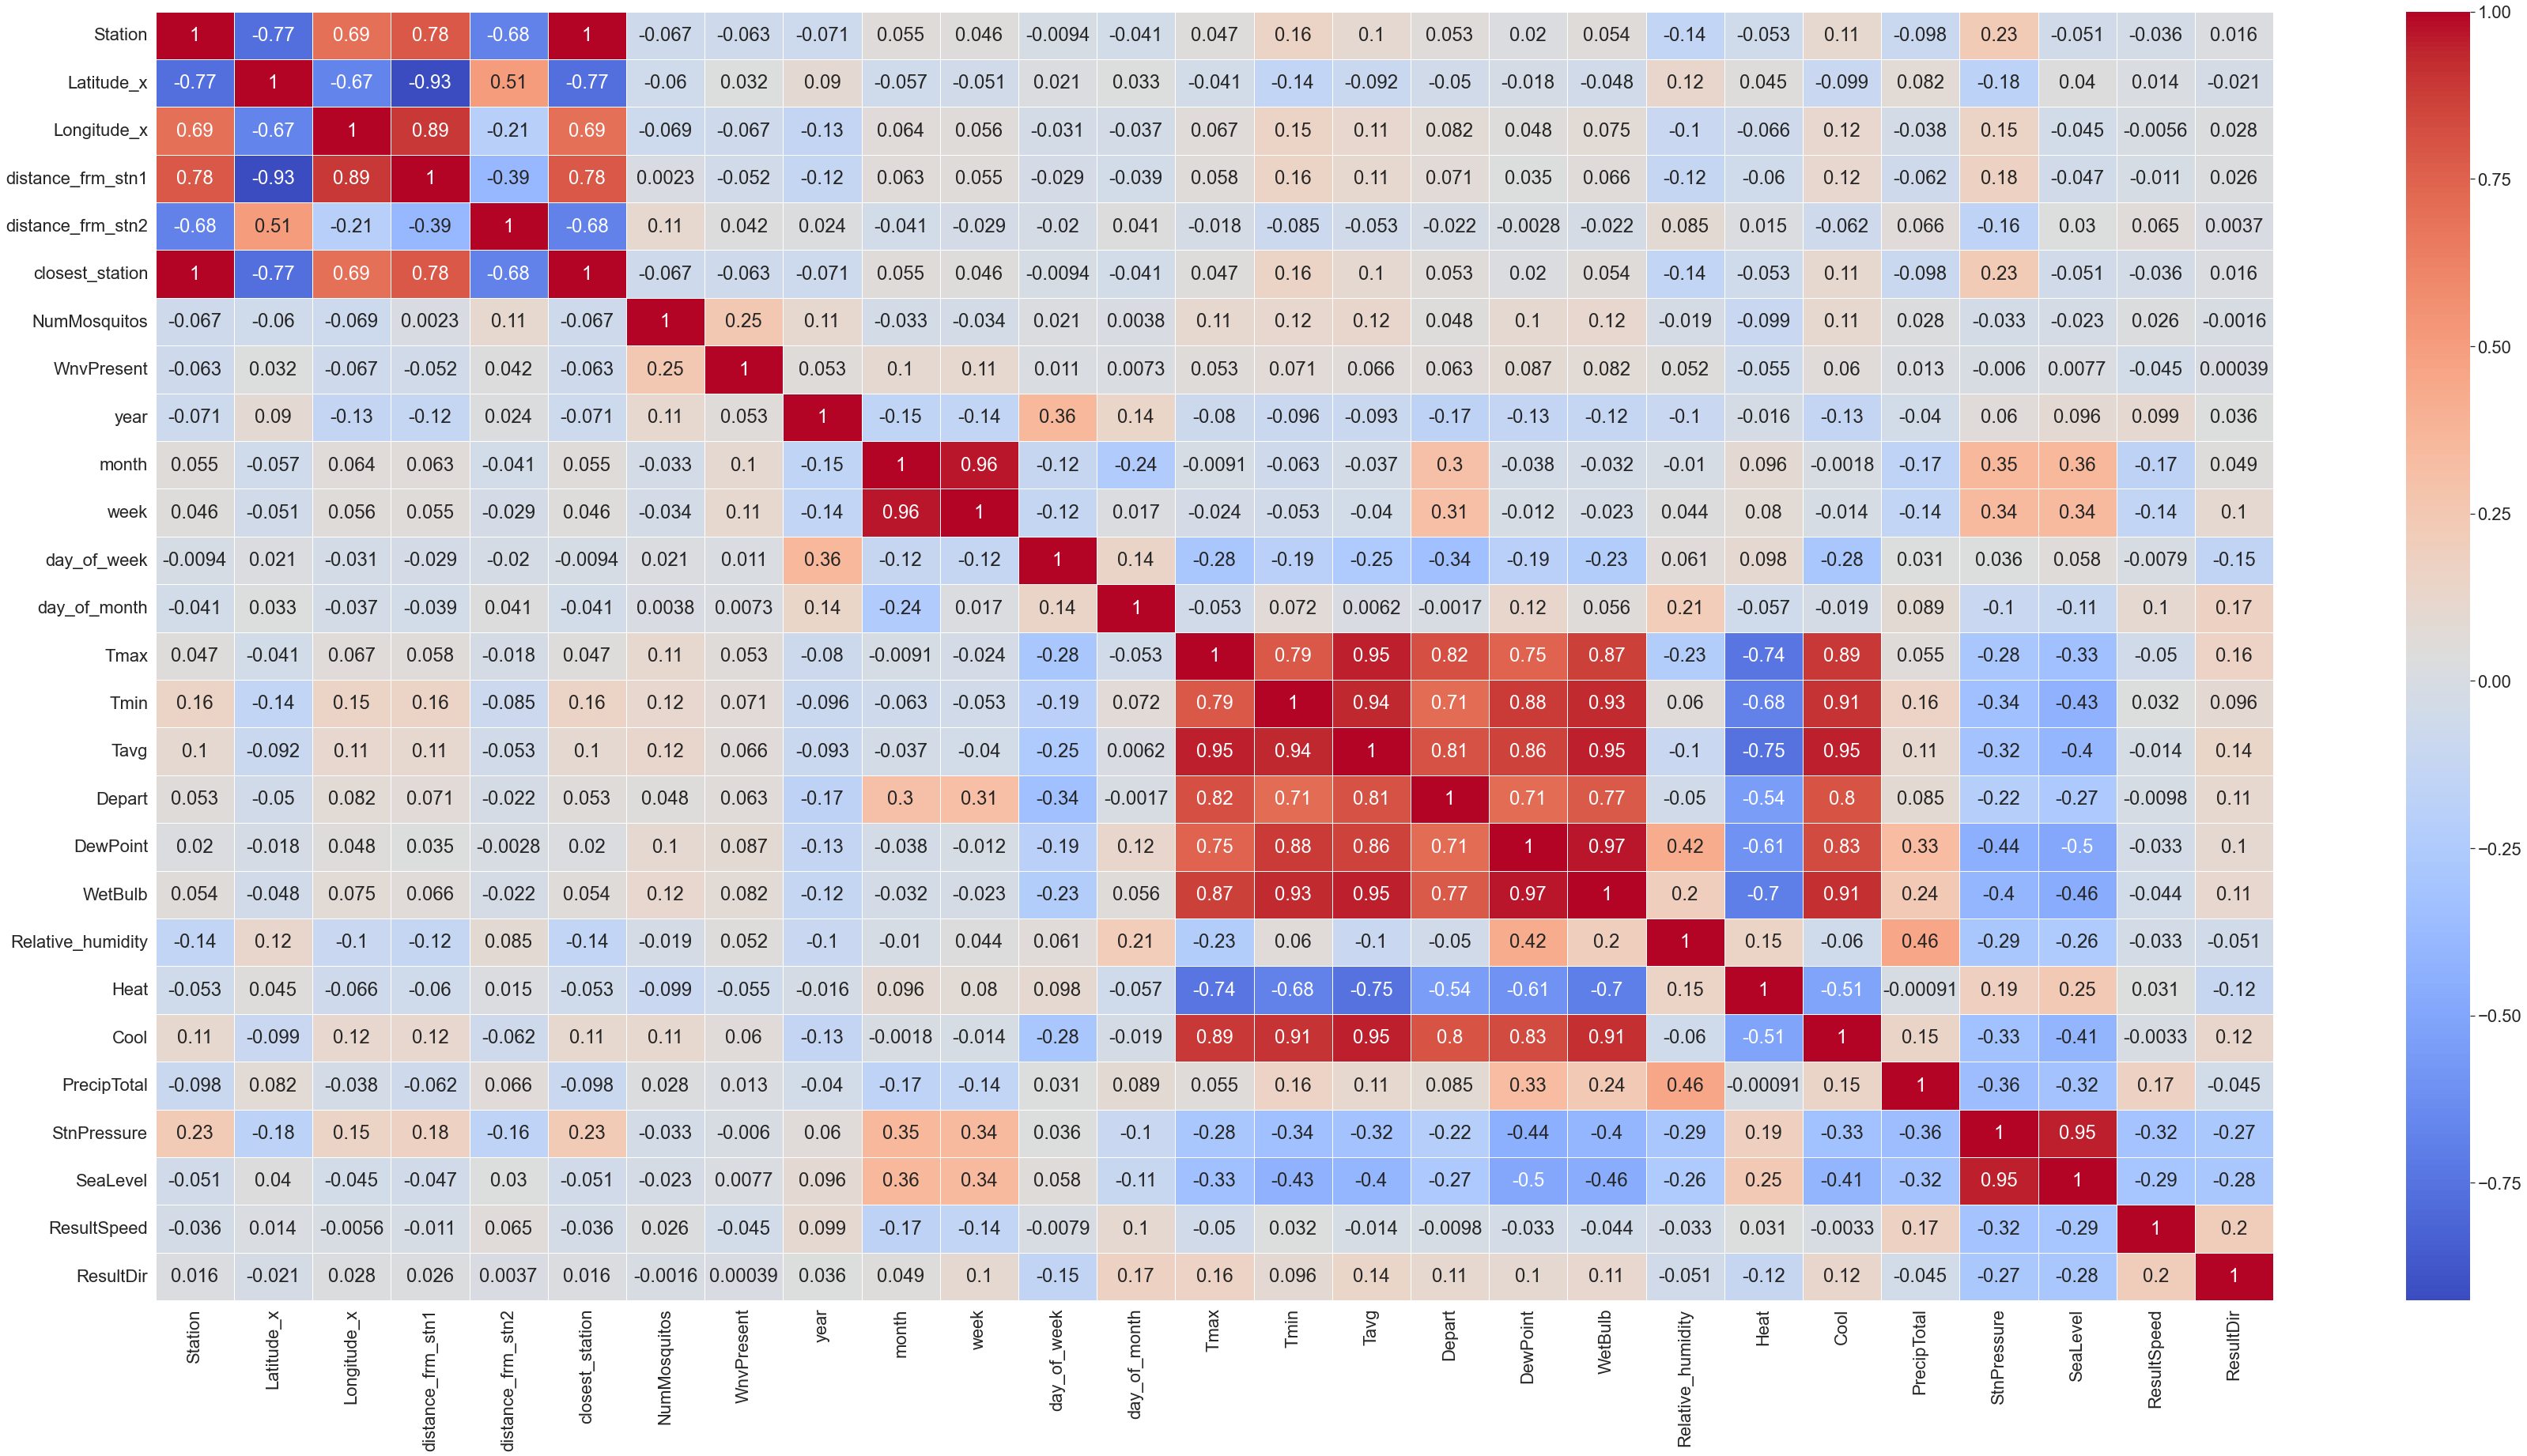

In [1068]:
plt.figure(figsize=(60,30))
sns.set(font_scale=2)
sns.heatmap(train_df.corr(), linewidths=1, annot=True, cmap="coolwarm")

### Monthly Analysis

In [1069]:
monthly_avg_temp = train_df.groupby(["Station","year","month"])["Tavg"].agg("mean").reset_index()
monthly_avg_percp = train_df.groupby(["Station","year","month"])["PrecipTotal"].agg("mean").reset_index()
monthly_avg_dew = train_df.groupby(["Station","year","month"])["DewPoint"].agg("mean").reset_index()
monthly_avg_wb = train_df.groupby(["Station","year","month"])["WetBulb"].agg("mean").reset_index()
monthly_avg_msq_count = train_df.groupby(["Station","year","month"])["NumMosquitos"].agg("mean").reset_index()
monthly_avg_virus_count = train_df.groupby(["Station","year","month"])["WnvPresent"].agg("mean").reset_index()
monthly_avg_humidity = train_df.groupby(["Station","year","month"])["Relative_humidity"].agg("mean").reset_index()


<AxesSubplot:xlabel='month', ylabel='Tavg'>

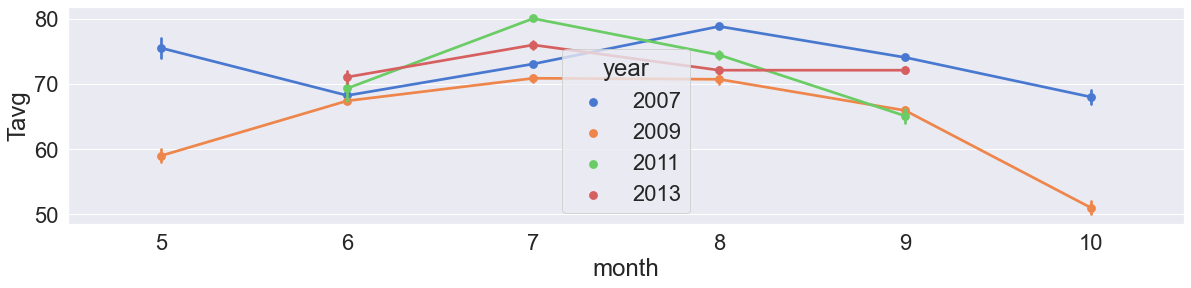

In [1070]:
fig = plt.figure(figsize=(20,4))
sns.pointplot(data=monthly_avg_temp
                    ,x="month"
                    , y="Tavg"
                    , hue="year"
                    ,  palette="muted")

2007 August  and 2011 July had higher average temperatures and July and Aug seems to have normally higher tempratures.

<AxesSubplot:xlabel='month', ylabel='PrecipTotal'>

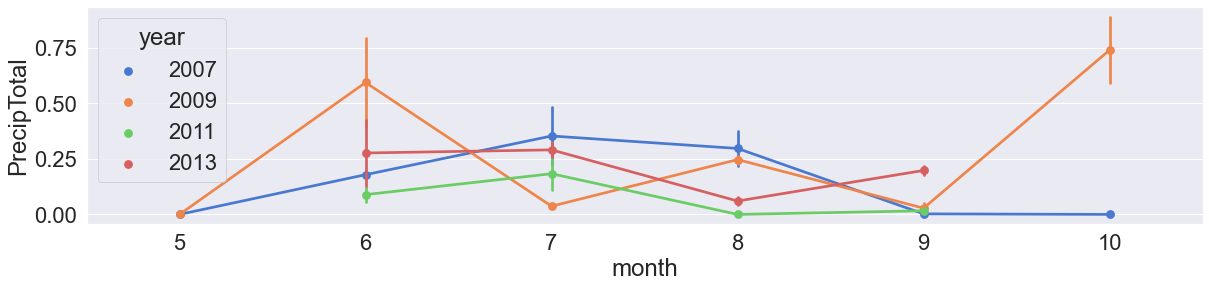

In [1071]:
fig = plt.figure(figsize=(20,4))
sns.pointplot(data=monthly_avg_percp
                    , x="month"
                    , y="PrecipTotal"
                    , hue="year"
                    , palette="muted")

<AxesSubplot:xlabel='month', ylabel='Relative_humidity'>

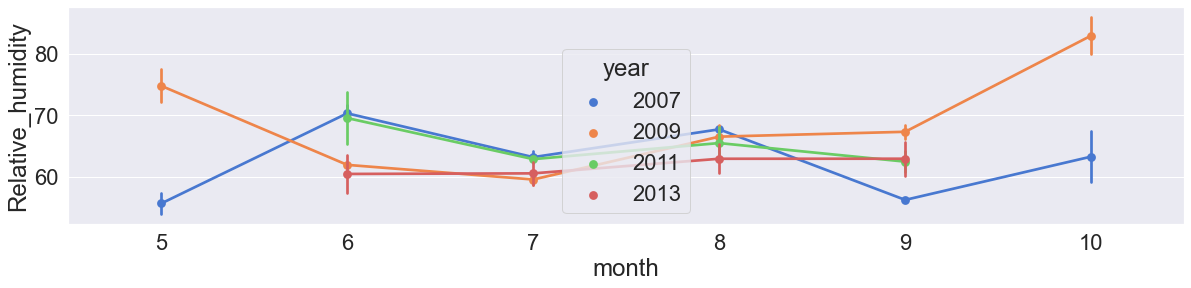

In [1072]:
fig = plt.figure(figsize=(20,4))
sns.pointplot(data=monthly_avg_humidity
                    ,x="month"
                    , y="Relative_humidity"
                    , hue="year"
                    ,  palette="muted")

2007 August  was more Humid than other months and year.

<AxesSubplot:xlabel='month', ylabel='DewPoint'>

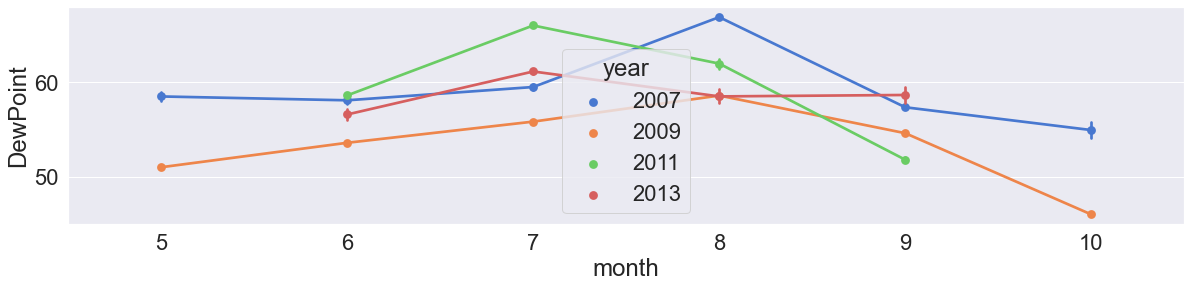

In [1073]:
fig = plt.figure(figsize=(20,4))
sns.pointplot(data=monthly_avg_dew
                    , x="month"
                    , y="DewPoint"
                    , hue="year"
                    ,  palette="muted")

<AxesSubplot:xlabel='month', ylabel='WetBulb'>

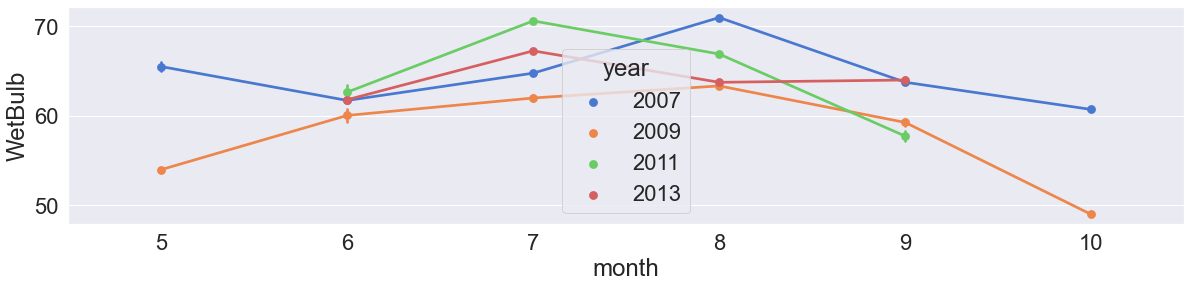

In [1074]:
fig = plt.figure(figsize=(20,4))
sns.pointplot(data=monthly_avg_wb
                    , x="month"
                    , y="WetBulb"
                    , hue="year"
                    ,  palette="muted")

<AxesSubplot:xlabel='month', ylabel='NumMosquitos'>

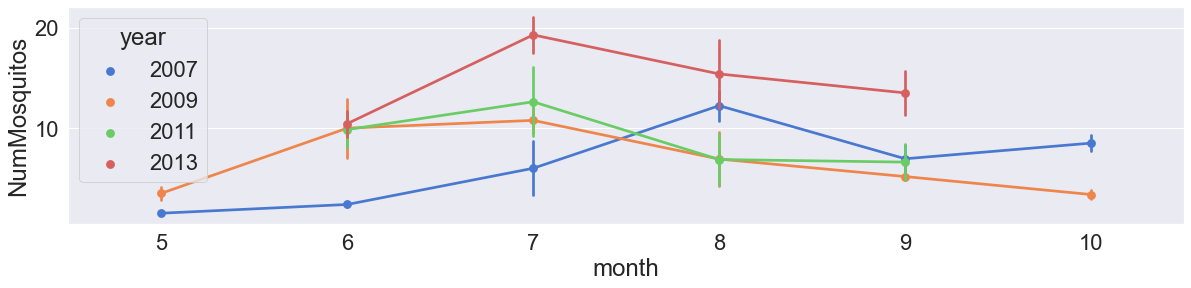

In [1075]:
fig = plt.figure(figsize=(20,4))
sns.pointplot(data=monthly_avg_msq_count
                    , x="month"
                    , y="NumMosquitos"
                    , hue="year"
                    ,  palette="muted")

<AxesSubplot:xlabel='month', ylabel='WnvPresent'>

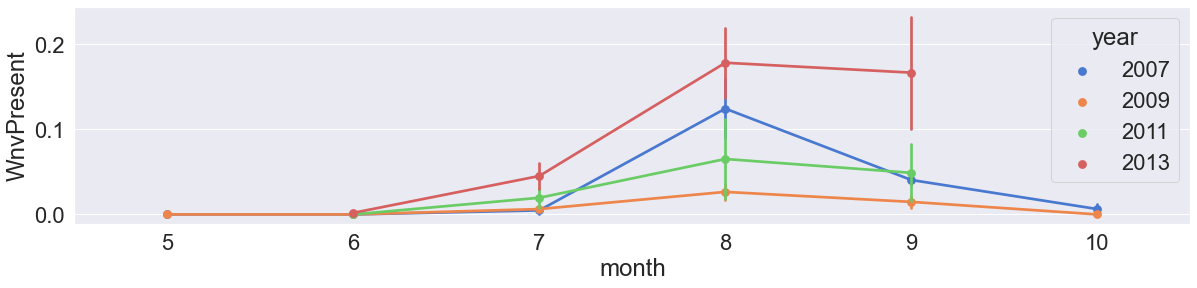

In [1076]:
fig = plt.figure(figsize=(20,4))
sns.pointplot(data=monthly_avg_virus_count
                    , x="month"
                    , y="WnvPresent"
                    , hue="year"
                    ,  palette="muted")

September 2013, was a dry month, less humid with high temprature compared to other years.

In [1077]:
weekly_avg_temp = train_df.groupby(["Station","year","month", "week"])["Tavg"].agg("mean").reset_index()
weekly_avg_percp = train_df.groupby(["Station","year","month", "week"])["PrecipTotal"].agg("mean").reset_index()
weekly_avg_dew = train_df.groupby(["Station","year","month", "week"])["DewPoint"].agg("mean").reset_index()
weekly_avg_wb = train_df.groupby(["Station","year","month", "week"])["WetBulb"].agg("mean").reset_index()
weekly_avg_msq_count = train_df.groupby(["Station", "year", "week"])["NumMosquitos"].agg("mean").reset_index()
weekly_avg_virus_count = train_df.groupby(["Station", "year", "week"])["WnvPresent"].agg("sum").reset_index()
weekly_avg_humidity = train_df.groupby(["Station", "year", "week"])["Relative_humidity"].agg("sum").reset_index()


<AxesSubplot:xlabel='week', ylabel='Tavg'>

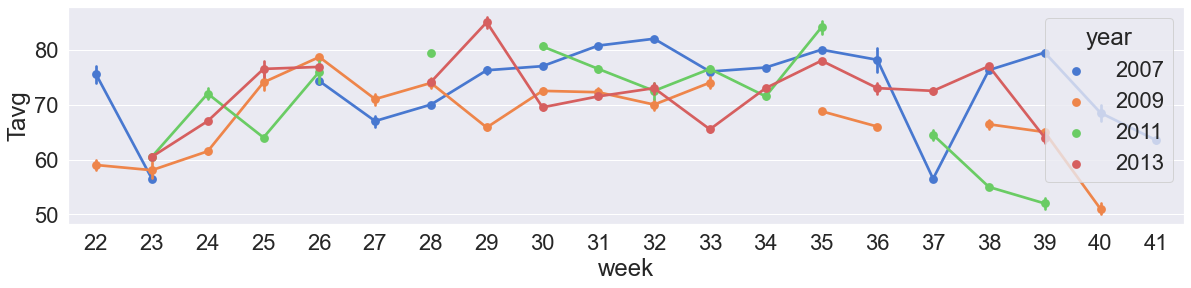

In [1078]:
fig = plt.figure(figsize=(20,4))
sns.pointplot(data=weekly_avg_temp
                    , x="week"
                    , y="Tavg"
                    , hue="year"
                    ,  palette="muted")

<AxesSubplot:xlabel='week', ylabel='PrecipTotal'>

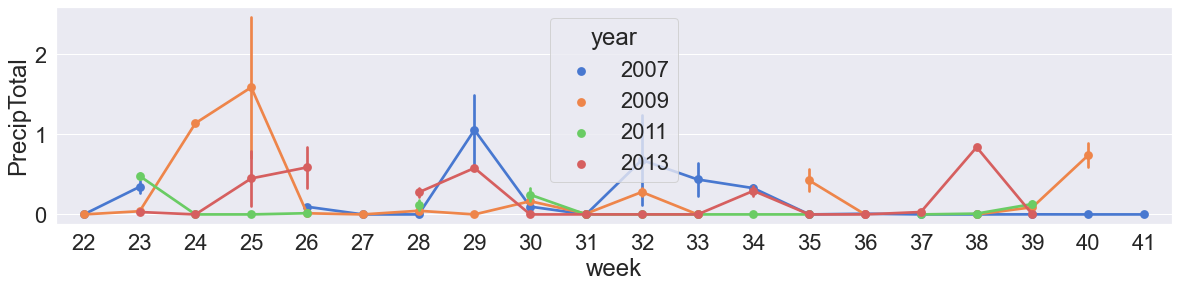

In [1079]:
fig = plt.figure(figsize=(20,4))
sns.pointplot(data=weekly_avg_percp
                    , x="week"
                    , y="PrecipTotal"
                    , hue="year"
                    ,  palette="muted")

<AxesSubplot:xlabel='week', ylabel='NumMosquitos'>

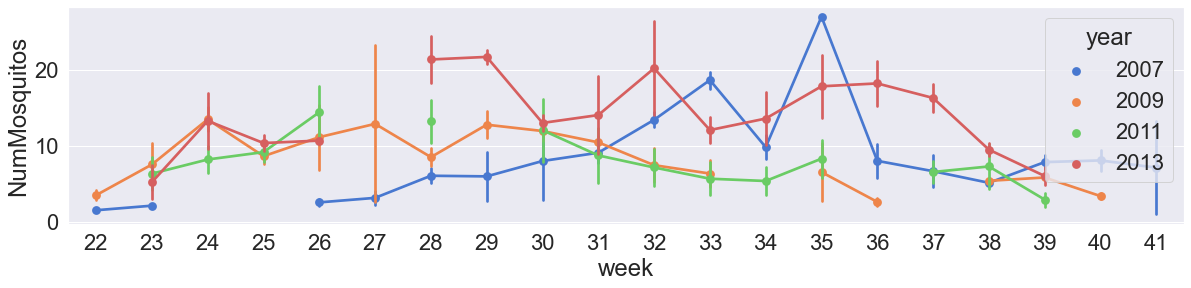

In [1080]:
fig = plt.figure(figsize=(20,4))
sns.pointplot(data=weekly_avg_msq_count
                    , x="week"
                    , y="NumMosquitos"
                    , hue="year"
                    ,  palette="muted")

<AxesSubplot:xlabel='week', ylabel='WnvPresent'>

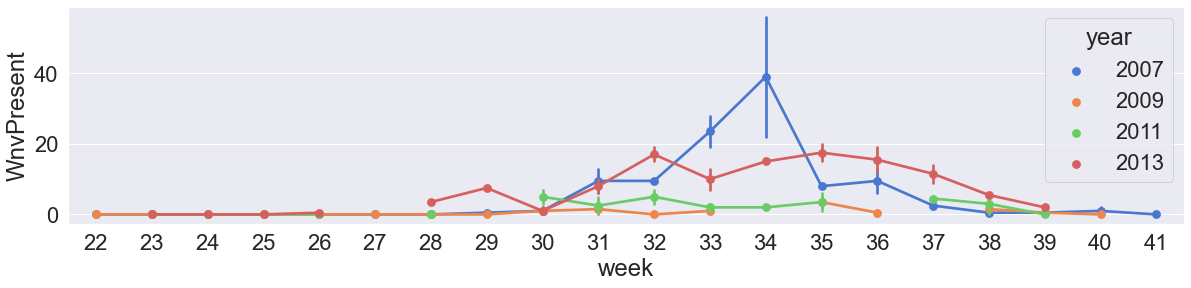

In [1081]:
fig = plt.figure(figsize=(20,4))
sns.pointplot(data=weekly_avg_virus_count
                    , x="week"
                    , y="WnvPresent"
                    , hue="year"
                    ,  palette="muted")

<AxesSubplot:xlabel='week', ylabel='Relative_humidity'>

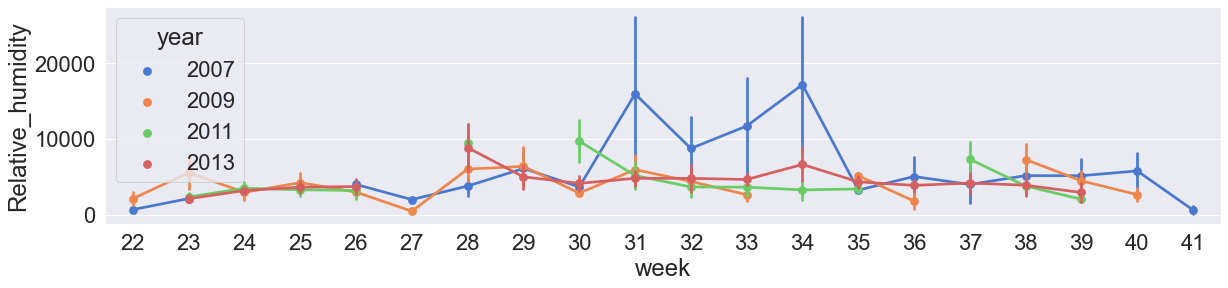

In [1082]:
fig = plt.figure(figsize=(20,4))
sns.pointplot(data=weekly_avg_humidity
                    , x="week"
                    , y="Relative_humidity"
                    , hue="year"
                    , palette="muted")

[Text(0, 0, '5'),
 Text(1, 0, '6'),
 Text(2, 0, '7'),
 Text(3, 0, '8'),
 Text(4, 0, '9'),
 Text(5, 0, '10')]

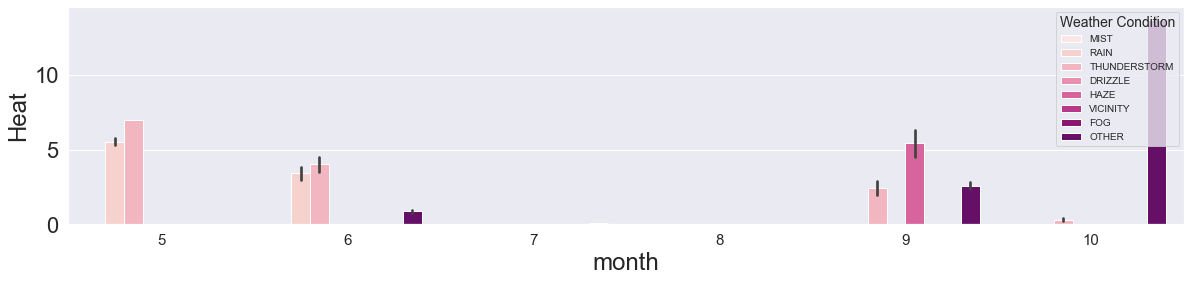

In [1083]:
fig = plt.figure(figsize=(20,4))
p= sns.barplot(data=train_df
                    , x="month"
                    , y="Heat"
                    , hue="CodeSumDesc"
                    , palette="RdPu")
plt.legend(title='Weather Condition', fontsize='10', title_fontsize='14', loc="upper right")
p.set_xticklabels(p.get_xticklabels(),rotation=0, size=15)

[Text(0, 0, '5'),
 Text(1, 0, '6'),
 Text(2, 0, '7'),
 Text(3, 0, '8'),
 Text(4, 0, '9'),
 Text(5, 0, '10')]

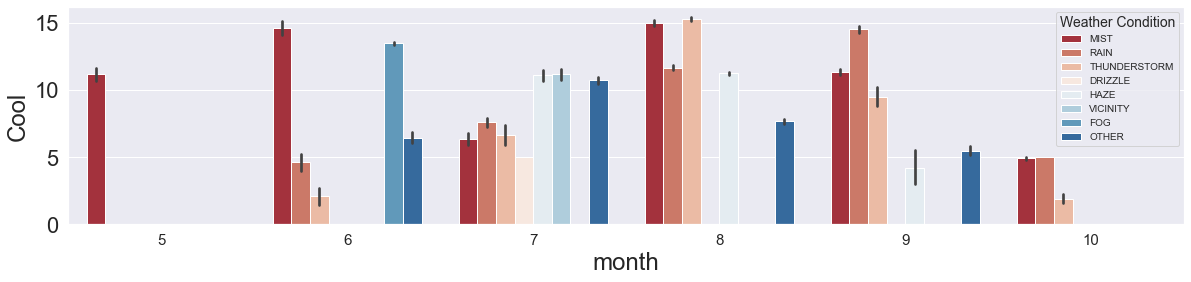

In [1084]:
fig = plt.figure(figsize=(20,4))
p= sns.barplot(data=train_df
                    , x="month"
                    , y="Cool"
                    , hue="CodeSumDesc"
                    , palette="RdBu")

plt.legend(title='Weather Condition', fontsize='10', title_fontsize='14', loc="upper right")
p.set_xticklabels(p.get_xticklabels(),rotation=0, size=15)

In [1085]:
def mkseason(n):
    if 3<=n<=5: season = 'Spring'
    elif 6<=n<=8: season = 'Summer'
    elif 9<=n<=11: season = 'Fall'
    else: season = 'Winter'
    return(season)

In [1086]:
train_df['Season'] = train_df.month.apply(mkseason)

In [1087]:
def mkmonth(n):
    if n==5: month = 'May'
    elif n==6: month = 'June'
    elif n==7: month = 'July'
    elif n==8: month = 'Aug'
    elif n==9: month = 'Sep'
    else: month = 'Oct'
    return(month)

In [1088]:
train_df["monthOfYear"] = train_df.month.apply(mkmonth)

In [1089]:
# total days of mist, rain etc. per week.
codesum_df= train_df[["CodeSumDesc","year","month","week","day_of_week","day_of_month"]].drop_duplicates(keep="first")
codesum_yr_group = codesum_df.groupby(["year","month","week","CodeSumDesc"], sort=True)
codesum_wk_group = train_df.groupby(["CodeSumDesc","week"])
codesum_df = codesum_yr_group[["day_of_month", "day_of_week"]].nunique().reset_index()

# Add this information to our train_df.
train_df = train_df.merge(codesum_df, how="inner", on=["year", "month", "week", "CodeSumDesc"], suffixes=["_","_total"])

train_df.head()

Date  Station  Latitude_x  Longitude_x  distance_frm_stn1  \
0 2007-05-29        1   41.954690   -87.800991               7.35   
1 2007-05-29        1   41.954690   -87.800991               7.35   
2 2007-05-29        1   41.994991   -87.769279               8.43   
3 2007-05-29        1   41.974089   -87.824812               5.75   
4 2007-05-29        1   41.974089   -87.824812               5.75   

   distance_frm_stn2  closest_station                 Species  NumMosquitos  \
0              11.91                1  CULEX PIPIENS/RESTUANS             1   
1              11.91                1          CULEX RESTUANS             1   
2              14.45                1          CULEX RESTUANS             1   
3              13.51                1  CULEX PIPIENS/RESTUANS             1   
4              13.51                1          CULEX RESTUANS             4   

   WnvPresent  ...  CodeSumDesc  PrecipTotal  StnPressure  SeaLevel  \
0           0  ...         MIST          0.0        29.39     30.11   
1           0  ...         MIST          0.0        29.39     30.11   
2           0  ...         MIST          0.0        29.39     30.11   
3           0  ...         MIST          0.0        29.39     30.11   
4           0  ...         MIST          0.0        29.39     30.11   

   ResultSpeed  ResultDir  Season  monthOfYear  day_of_month_total  \
0          5.8         18  Spring          May                   1   
1          5.8         18  Spring          May                   1   
2          5.8         18  Spring          May                   1   
3          5.8         18  Spring          May                   1   
4          5.8         18  Spring          May                   1   

   day_of_week_total  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  

[5 rows x 34 columns]

In [1090]:
train_df.rename(columns={"day_of_week_":"day_of_week","day_of_month_":"day_of_month","day_of_week_total":"weekly_#days_per_codesum","day_of_month_total":"monthly_#days_per_codesum", "Latitude_x":"Latitude", "Longitude_x":"Longitude"}, inplace=True)

In [1091]:
moving_avg = train_df[["Date","Latitude","Longitude", "Tavg", "Relative_humidity"]].sort_values(by="Date")
moving_avg["Avg_Temp_Diff_1D"] = moving_avg["Tavg"] - moving_avg.shift(periods=1)["Tavg"]
moving_avg["Avg_Temp_Diff_2D"] = moving_avg["Tavg"] - moving_avg.shift(periods=2)["Tavg"]
moving_avg["Avg_Temp_Diff_3D"] = moving_avg["Tavg"] - moving_avg.shift(periods=3)["Tavg"]
moving_avg["Avg_Temp_Diff_4D"] = moving_avg["Tavg"] - moving_avg.shift(periods=4)["Tavg"]
moving_avg["Avg_Temp_Diff_5D"] = moving_avg["Tavg"] - moving_avg.shift(periods=5)["Tavg"]
moving_avg["Avg_Temp_Diff_6D"] = moving_avg["Tavg"] - moving_avg.shift(periods=6)["Tavg"]
moving_avg["Avg_Temp_Diff_7D"] = moving_avg["Tavg"] - moving_avg.shift(periods=7)["Tavg"]
moving_avg.fillna(0, inplace=True)

In [1092]:
moving_avg["Avg_humidity_Diff_1D"] = moving_avg["Relative_humidity"] - moving_avg.shift(periods=1)["Relative_humidity"]
moving_avg["Avg_humidity_Diff_2D"] = moving_avg["Relative_humidity"] - moving_avg.shift(periods=2)["Relative_humidity"]
moving_avg["Avg_humidity_Diff_3D"] = moving_avg["Relative_humidity"] - moving_avg.shift(periods=3)["Relative_humidity"]
moving_avg["Avg_humidity_Diff_4D"] = moving_avg["Relative_humidity"] - moving_avg.shift(periods=4)["Relative_humidity"]
moving_avg["Avg_humidity_Diff_5D"] = moving_avg["Relative_humidity"] - moving_avg.shift(periods=5)["Relative_humidity"]
moving_avg["Avg_humidity_Diff_6D"] = moving_avg["Relative_humidity"] - moving_avg.shift(periods=6)["Relative_humidity"]
moving_avg["Avg_humidity_Diff_7D"] = moving_avg["Relative_humidity"] - moving_avg.shift(periods=7)["Relative_humidity"]
moving_avg.fillna(0, inplace=True)

In [1093]:
train_df = train_df.merge(moving_avg,how="inner", on =["Date","Latitude", "Longitude", "Tavg", "Relative_humidity"])

In [1094]:
train_df.columns

Index(['Date', 'Station', 'Latitude', 'Longitude', 'distance_frm_stn1',
       'distance_frm_stn2', 'closest_station', 'Species', 'NumMosquitos',
       'WnvPresent', 'year', 'month', 'week', 'day_of_week', 'day_of_month',
       'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb',
       'Relative_humidity', 'Heat', 'Cool', 'CodeSumDesc', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'Season',
       'monthOfYear', 'monthly_#days_per_codesum', 'weekly_#days_per_codesum',
       'Avg_Temp_Diff_1D', 'Avg_Temp_Diff_2D', 'Avg_Temp_Diff_3D',
       'Avg_Temp_Diff_4D', 'Avg_Temp_Diff_5D', 'Avg_Temp_Diff_6D',
       'Avg_Temp_Diff_7D', 'Avg_humidity_Diff_1D', 'Avg_humidity_Diff_2D',
       'Avg_humidity_Diff_3D', 'Avg_humidity_Diff_4D', 'Avg_humidity_Diff_5D',
       'Avg_humidity_Diff_6D', 'Avg_humidity_Diff_7D'],
      dtype='object')

Convert the datatypes of the Categorical columns to category

In [1095]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31880 entries, 0 to 31879
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       31880 non-null  datetime64[ns]
 1   Station                    31880 non-null  int64         
 2   Latitude                   31880 non-null  float64       
 3   Longitude                  31880 non-null  float64       
 4   distance_frm_stn1          31880 non-null  float64       
 5   distance_frm_stn2          31880 non-null  float64       
 6   closest_station            31880 non-null  int64         
 7   Species                    31880 non-null  object        
 8   NumMosquitos               31880 non-null  int64         
 9   WnvPresent                 31880 non-null  int64         
 10  year                       31880 non-null  int64         
 11  month                      31880 non-null  int64         
 12  week

In [1096]:
# category_columns = ['Station','year', 'month', 'week', 'day_of_week','day_of_month' ,'Species','CodeSumDesc', 'Season','monthOfYear']
# train_df[category_columns] = train_df[category_columns].astype(dtype="category")
# train_df.info()

In [1097]:
train_df.head()

Date  Station   Latitude  Longitude  distance_frm_stn1  \
0 2007-05-29        1  41.954690 -87.800991               7.35   
1 2007-05-29        1  41.954690 -87.800991               7.35   
2 2007-05-29        1  41.954690 -87.800991               7.35   
3 2007-05-29        1  41.954690 -87.800991               7.35   
4 2007-05-29        1  41.994991 -87.769279               8.43   

   distance_frm_stn2  closest_station                 Species  NumMosquitos  \
0              11.91                1  CULEX PIPIENS/RESTUANS             1   
1              11.91                1  CULEX PIPIENS/RESTUANS             1   
2              11.91                1          CULEX RESTUANS             1   
3              11.91                1          CULEX RESTUANS             1   
4              14.45                1          CULEX RESTUANS             1   

   WnvPresent  ...  Avg_Temp_Diff_5D  Avg_Temp_Diff_6D  Avg_Temp_Diff_7D  \
0           0  ...               0.0               0.0               0.0   
1           0  ...              -3.0              -3.0              -3.0   
2           0  ...               0.0               0.0               0.0   
3           0  ...              -3.0              -3.0              -3.0   
4           0  ...              -3.0              -3.0              -3.0   

   Avg_humidity_Diff_1D  Avg_humidity_Diff_2D  Avg_humidity_Diff_3D  \
0                  0.00                  0.00                  0.00   
1                  3.56                  3.56                  3.56   
2                  0.00                  0.00                  0.00   
3                  3.56                  3.56                  3.56   
4                  0.00                  3.56                  3.56   

   Avg_humidity_Diff_4D  Avg_humidity_Diff_5D  Avg_humidity_Diff_6D  \
0                  0.00                  0.00                  0.00   
1                  3.56                  3.56                  3.56   
2                  0.00                  0.00                  0.00   
3                  3.56                  3.56                  3.56   
4                  3.56                  3.56                  3.56   

   Avg_humidity_Diff_7D  
0                  0.00  
1                  3.56  
2                  0.00  
3                  3.56  
4                  3.56  

[5 rows x 48 columns]

<AxesSubplot:>

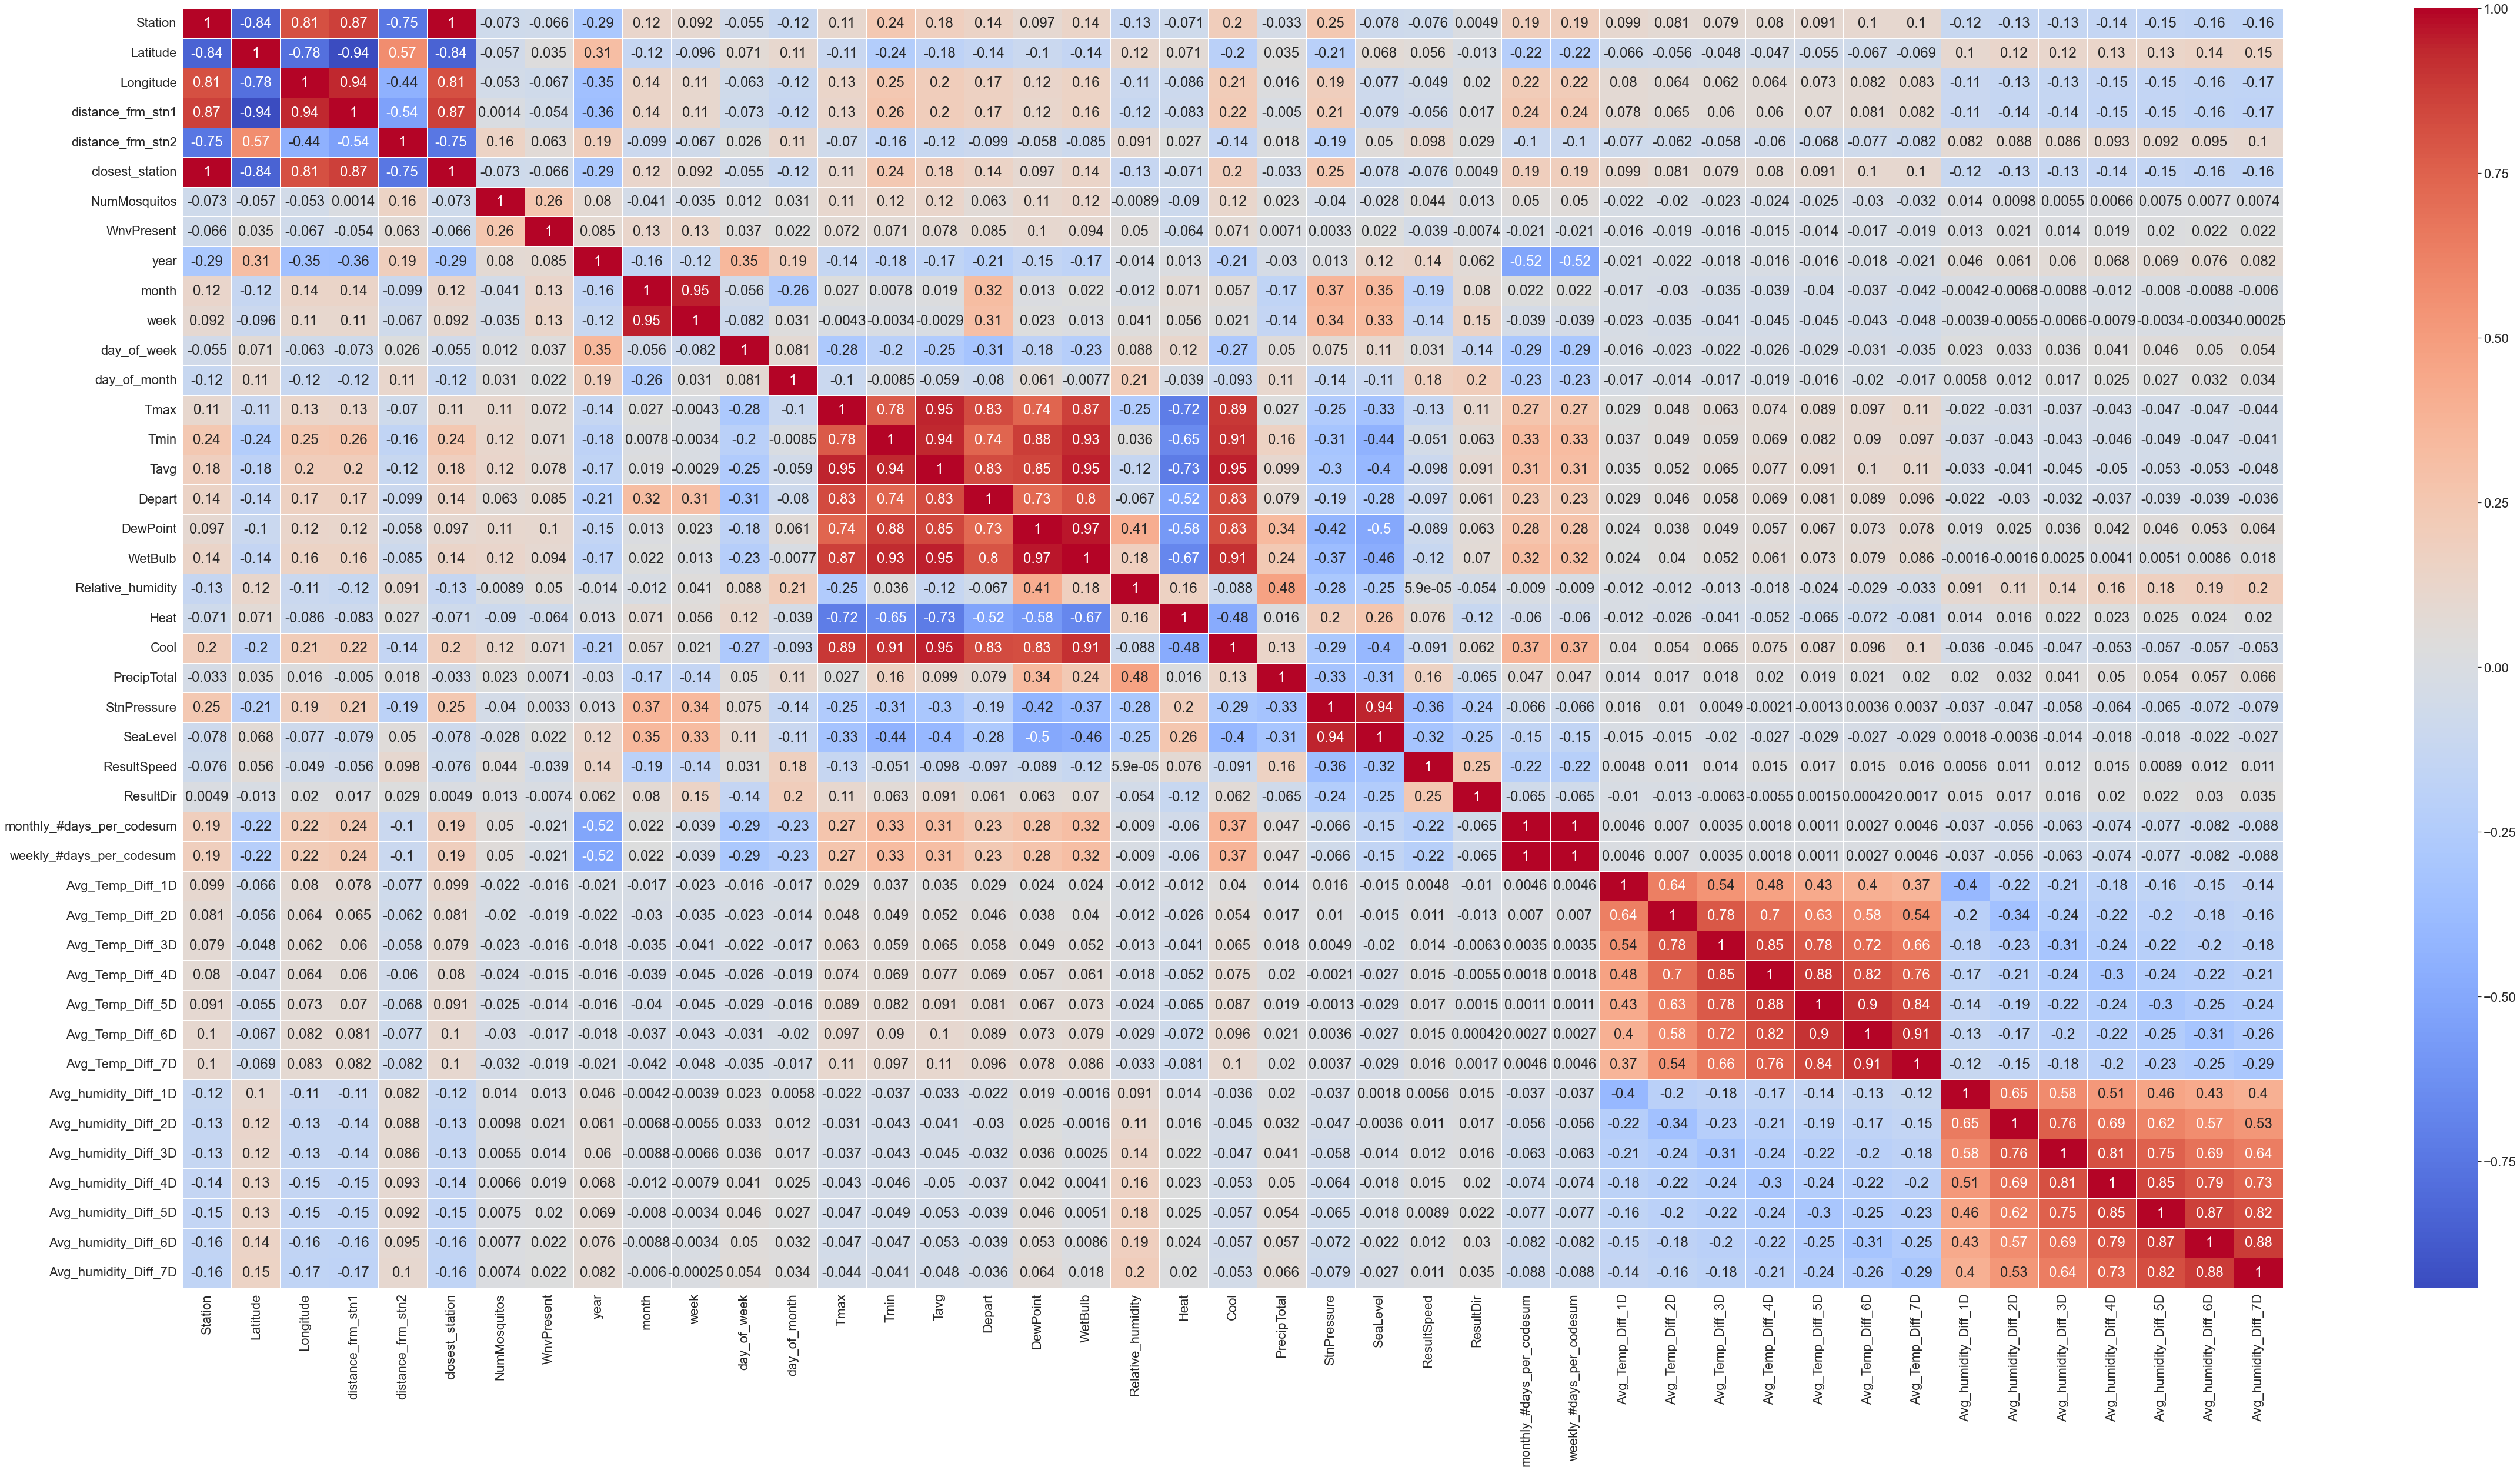

In [1101]:
plt.figure(figsize=(80,40))
sns.set(font_scale=2)
sns.heatmap(train_df.corr(), linewidths=1, annot=True, cmap="coolwarm")

In [1099]:
train_df.to_csv("../output/train_df_analyzed.csv")